# ***Аналитика новостного сайта The New York Times***

### Выгрузил информацию о статьях в период с 1 февраля по 31 мая из секций "World", "U.S." и "Sports" новостного сайта The New York Times, чтобы посмотреть как влияют политические и спортивные события на количество публикаций. 
### На основе полученных данных сделал вывод, что самые высокие показатели были в феврале из-за олимпиады и начала спецоперации на территории Украины и в мае из-за публикации результатов первичных выборов в США.

In [1]:
from datetime import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

plt.style.use('ggplot')

def CheckDuplicates(df, column_name): # Функция, которая ищет и удаляет строки-дубликаты
    if any(df[column_name].duplicated()) == True: # Проверяем есть ли строки-дубликаты
        return df.drop_duplicates(column_name) # Если есть - удаляем
    else: return df

### **Создадим датафреймы для 3 основных секций:**

In [2]:
names = os.listdir('data') # Передаём в переменную имена текстовых файлов
data = dict() # Создаём пустой словарь
for name in names:
    path = os.path.join('data', name)
    with open(path) as f:
        loaded_data = json.load(f) 
        key = name.split('.')[0] # В словаре ключ - имя файла (без части .json)
        data[key] = pd.DataFrame(loaded_data) # Значение - датафрейм
        data[key]['Date'] = pd.to_datetime(data[key]['Date'], format="%Y/%m/%d") # Преобразуем даты

df_world = pd.DataFrame() # Создаём основные датафреймы
df_us = pd.DataFrame()
df_sports = pd.DataFrame()

for name in data.keys(): # Заполняем основные датафреймы
    if 'world' in name:
        df_world = pd.concat([df_world, data[name]])
    if 'us' in name:
        df_us = pd.concat([df_us, data[name]])
    if 'sport' in name:
        df_sports = pd.concat([df_sports, data[name]])

df_world = CheckDuplicates(df_world, 'Title') # Удаляем все строки-дубликаты 
df_world = df_world.query("'2022-02-01' <= Date <= '2022-05-31'") # Оставляем статьи, опубликованные с 1 февраля по 31 мая

df_us = CheckDuplicates(df_us, 'Title')
df_us = df_us.query("'2022-02-01' <= Date <= '2022-05-31'")

df_sports = CheckDuplicates(df_sports, 'Title')
df_sports = df_sports.query("'2022-02-01' <= Date <= '2022-05-31'")

### **Посмотрим количество всех публикаций:**

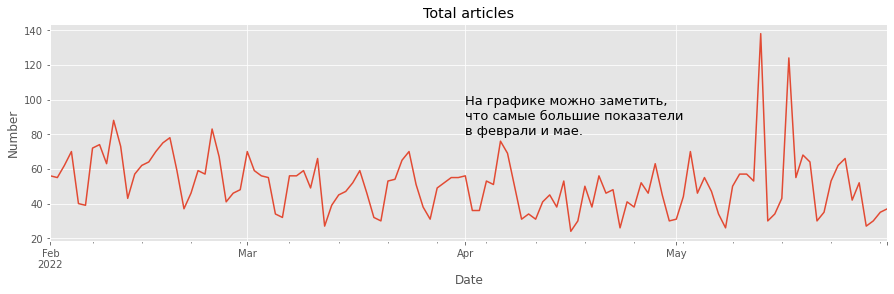

In [3]:
plt.figure(figsize=(15,4))
plt.title("Total articles")
plt.ylabel("Number")
plt.text('2022-04-1', 80, 'На графике можно заметить,\nчто самые большие показатели\nв феврали и мае.', fontsize = 13)

pd.concat([df_sports, df_us, df_world], sort = False).groupby(['Date']).count()['Title'].plot()
plt.show()

## **Теперь посмотрим количество публикаций, для каждой секции отдельно.**
### **World:**

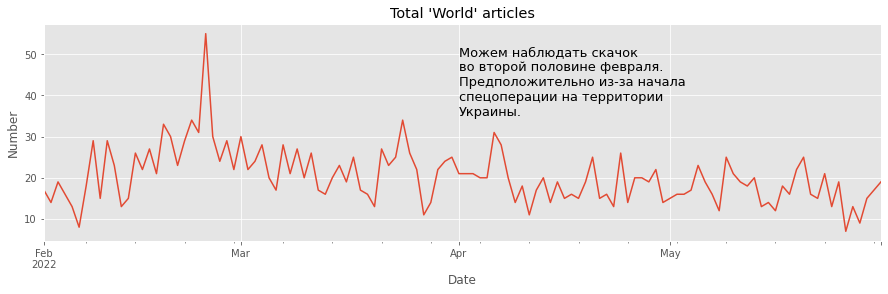

In [4]:
plt.figure(figsize=(15,4))
plt.title("Total 'World' articles")
plt.ylabel("Number")
plt.text('2022-04-01', 35, 'Можем наблюдать скачок\nво второй половине февраля.\nПредположительно из-за начала\nспецоперации на территории\nУкраины.', fontsize = 13)

df_world.groupby(['Date']).count()['Title'].plot()
plt.show()

### **Чтобы подтвердить предположение, построим графики для 3 самых популярных категорий секции World:**

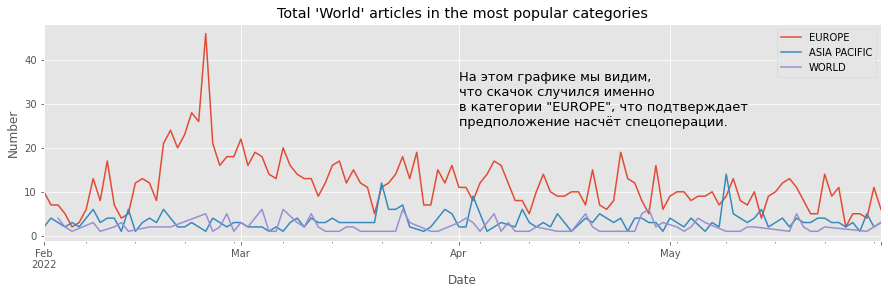

In [5]:
categories = df_world.groupby('Category', as_index=False).agg({'Title': 'count'})   \
    .sort_values("Title", ascending = False)['Category'].head(3)

plt.figure(figsize=(15,4))
plt.title("Total 'World' articles in the most popular categories")
plt.ylabel("Number")
plt.text('2022-04-01', 25, 'На этом графике мы видим,\nчто скачок случился именно\nв категории "EUROPE", что подтверждает\nпредположение насчёт спецоперации.', fontsize = 13)
    
for category in categories:
    df_world[df_world['Category']==category].groupby(['Date']).count()['Title'].plot(label = category).legend()
    
plt.show()

### **U.S.:**

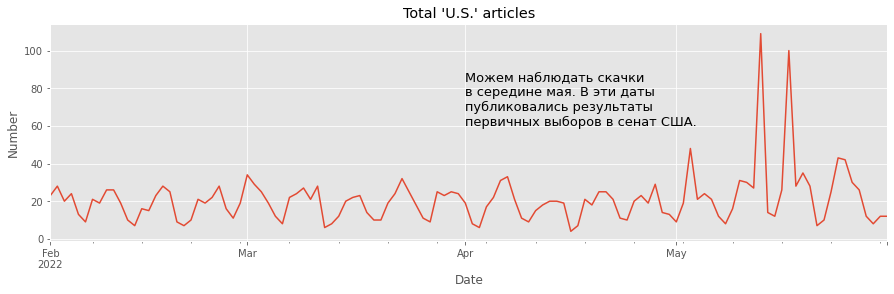

In [8]:
plt.figure(figsize=(15,4))
plt.title("Total 'U.S.' articles")
plt.ylabel("Number")
plt.text('2022-04-01', 60, 'Можем наблюдать скачки\nв середине мая. В эти даты\nпубликовались результаты\nпервичных выборов в сенат США.', fontsize = 13)

df_us.groupby(['Date']).count()['Title'].plot()
plt.show()

### **Чтобы подтвердить, что скачки из-за публикации результатов выборов, построим графики для 3 самых популярных категорий секции U.S.:**

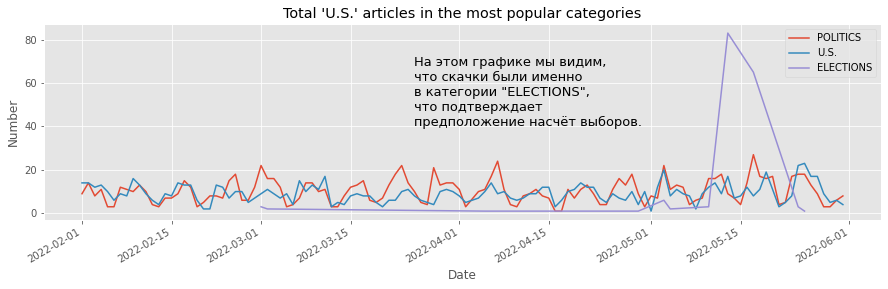

In [9]:
categories = df_us.groupby('Category', as_index=False).agg({'Title': 'count'}) \
    .sort_values("Title", ascending = False)['Category'].head(3)

plt.figure(figsize=(15,4))
plt.title("Total 'U.S.' articles in the most popular categories")
plt.ylabel("Number")
plt.text('2022-03-25', 40, 'На этом графике мы видим,\nчто скачки были именно\nв категории "ELECTIONS",\nчто подтверждает\nпредположение насчёт выборов.', fontsize = 13)
    
for category in categories:
    df_us[df_us['Category']==category].groupby(['Date']).count()['Title'].plot(label = category).legend()
    
plt.show()

### **Sports:**

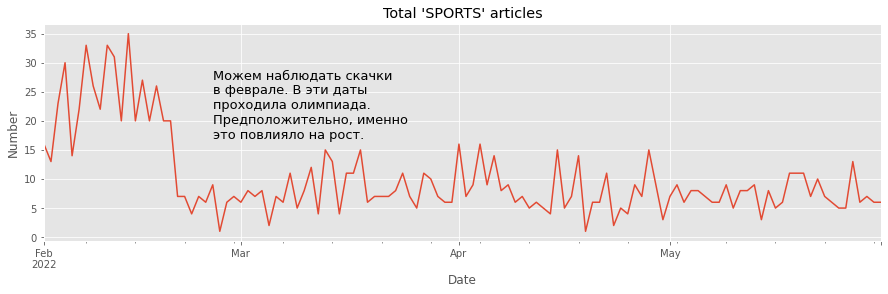

In [10]:
plt.figure(figsize=(15,4))
plt.title("Total 'SPORTS' articles")
plt.ylabel("Number")
plt.text('2022-02-25', 17, 'Можем наблюдать скачки\nв феврале. В эти даты\nпроходила олимпиада.\nПредположительно, именно\nэто повлияло на рост.', fontsize = 13)

df_sports.groupby(['Date']).count()['Title'].plot()
plt.show()

### **Чтобы подтвердить предположение, построим графики для 3 самых популярных категорий секции Sports:**

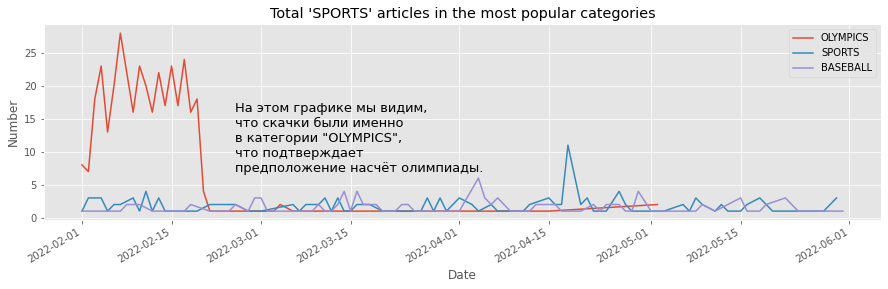

In [11]:
categories = df_sports.groupby('Category', as_index=False).agg({'Title': 'count'}) \
    .sort_values("Title", ascending = False)['Category'].head(3)

plt.figure(figsize=(15,4))
plt.title("Total 'SPORTS' articles in the most popular categories")
plt.ylabel("Number")
plt.text('2022-02-25', 7, 'На этом графике мы видим,\nчто скачки были именно\nв категории "OLYMPICS",\nчто подтверждает\nпредположение насчёт олимпиады.', fontsize = 13)
    
for category in categories:
    df_sports[df_sports['Category']==category].groupby(['Date']).count()['Title'].plot(label = category).legend()
    
plt.show()